# Examen Módulo 2 - Simulación Montecarlo. <font color=blue>Tipo de examen 2</font>.
Lea cuidadosamente las siguientes **indicaciones** antes de comenzar el examen:
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *E2ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *E2ZapataCristian*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

# Primer punto. Evaluación numérica de integrales y áreas usando Montecarlo (30 puntos).

- En la clase de evaluación de integrales numéricas por montecarlo vimos dos tipos de evaluación de integrales.
- El tipo 1 se basaba en la definición de valor promedio de una función.
- El tipo 2 se basaba en probabilidades y una variable aleatoria de bernoulli (para encontrar áreas).

###  Parte A
**Enunciado** Considere las funciones $f_1(x)=\frac{x^3}{\sqrt{1+x^2}}$,  $f_2(x)=\sin(2x)\tan(8x)$, $f_3(x)=\sqrt{x^3}(1+\sin(x^7))$ y $f_4(x)=\log_{10}(2x)+8^x$.



**Punto A.1 (12 puntos)** Definir una función llamada  `montecarlo1` que corresponda al tipo 1 visto en clase para resolver integrales basada en la definición de valor promedio de una función.

**Solución**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def montecarlo1(f, a, b, N):
    u = (b-a)*np.random.rand(N)+a
    return (b-a)*np.mean(f(u))

**Punto A.2 (13 puntos)** Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo (1,6). Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000, 100000, 1000000 y 10000000 términos) y cuyas columnas correspondan a las funciones.

**Solución**

**Solución**

In [6]:
# Funciones
def f1(x):
    return (np.sqrt(1+x**8))/np.log(x)

def f2(x):
    return np.cos(x**2)/np.sin(2**x)

def f3(x):
    return np.sqrt(x**8)/(np.tan(2**x))

def f4(x):
    return (2**x)/(x**4)

a, b = 1, 6
N = np.logspace(1, 8, 8).astype(int)

# DataFrame con resultados
tabla = pd.DataFrame(index = N, columns=['f1', 'f2'])
for n in N:
    tabla.loc[n,'f1'] = montecarlo1(f1, a, b, n)
    tabla.loc[n,'f2'] = montecarlo1(f2, a, b, n)
    tabla.loc[n,'f3'] = montecarlo1(f3, a, b, n)
    tabla.loc[n,'f4'] = montecarlo1(f4, a, b, n)
tabla

,f1,f2,f3,f4
10,958.891,-1.28766,2590.323323,0.734367
100,920.212,-8.42453,-1386.517081,1.115183
1000,979.178,115.285,-21582.580699,1.122496
10000,1023.08,-3.10381,-2505.950985,1.061678
100000,1019.31,-4.46212,-3075.279661,1.046543
1000000,1017.94,-3.8749,-305.059826,1.057803
10000000,1017.59,-0.11045,2290.835154,1.058711
100000000,1025.09,1.66732,-1333.330331,1.058997


###  Parte B
**Enunciado** Considere la región definida por:
$$ \frac{(x-10)^2}{8} + \frac{(y-7)^2}{5} \leq 9 .$$

**Punto B.1 (5 puntos)** Definir una función llamada  `montecarlo2` que corresponda al tipo 2 visto en clase para encontrar áreas basada en probabilidades y una variable aleatoria de bernoulli.

**Solución**

In [8]:
def montecarlo2(R,a1,b1,a2,b2,N):
    A_R=(b1-a1)*(b2-a2)
    x= np.random.uniform(a1,b1, N.astype(int))
    y= np.random.uniform(a2,b2, N.astype(int))
    return A_R*np.sum(R(x,y))/N

**Punto B.2 (5 puntos)** Graficar la región dada anteriormente y encontrar los límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$

**Solución**

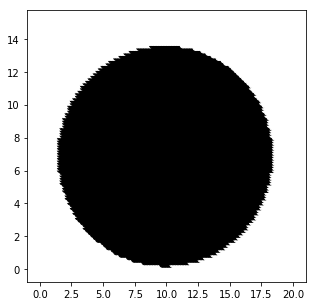

In [12]:
N= 100
x=np.linspace(0,20,N)
y=np.linspace(0,15,N)


def R1(x,y):
    return ((x-10)**2)/8 + ((y-7)**2)/5<=9 

X , Y= np.meshgrid(x,y)
plt.figure(figsize=(5,5))
plt.scatter(X,Y,c=~R1(X,Y),cmap='bone')
plt.show()

**Punto B.3 (10 puntos)** Utilizar la función `montecarlo2` para realizar la evaluación numérica del área. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000, 100000, 1000000 y 10000000 términos) y cuyas columnas correspondan a las funciones.

**Solución**

In [13]:
# Resolver
a1,a2,b1,b2=0,0,20,15
N=np.logspace(1,7,7).astype(int)

df= pd.DataFrame(index=N,columns=['Approx','Error'])

for n in N:
    df.loc[n,'Approx'] = montecarlo2(R1,a1,b1,a2,b2,n)
df['Error'] = np.abs(df['Approx']-18*np.sqrt(10)*np.pi)
df

,Approx,Error
10,240,61.1774
100,180,1.17741
1000,184.8,5.97741
10000,180.06,1.23741
100000,179.199,0.376411
1000000,178.785,0.0378888
10000000,178.829,0.00597122


# Tercer punto. Probabilidad Precio-Umbral (40 puntos).

**Enunciado**. En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

**Punto 1 (10 puntos)** Descargar datos de los precios ajustados al cierre desde `yahoo finance` de los activos: Facebook, Inc. y McDonald's Corporation en un DataFrame de `pandas` con ayuda del módulo `pandas-datareader`.

Considere como fecha de inicio el 1-Enero-2014 y fecha final el 31-Diciembre-2017.

Grafique los datos obtenidos en un mismo gráfico.

**Punto 1 (10 puntos)** Descargar datos de los precios ajustados al cierre desde `yahoo finance` de los activos: Ford Motor Company y Tesla, Inc. en un DataFrame de `pandas` con ayuda del módulo `pandas-datareader`.

Considere como fecha de inicio el 1-Enero-2016 y fecha final el 31-Diciembre-2018.

Grafique los datos obtenidos en un mismo gráfico.

**Solución**

**Solución**

In [15]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def get_closes(names, start_date, end_date):
    closes = web.DataReader(name = names,
                            data_source="yahoo",
                            start=start_date,
                           end=end_date)
    return closes['Adj Close']

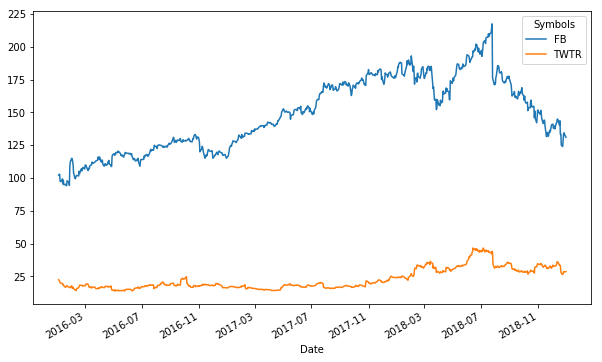

In [18]:
# Precios
names = ['FB','TWTR']
start, end = '2016-01-01', '2018-12-31'
closes = get_closes(names=names, start_date=start, end_date=end)
closes.plot(figsize=(10,6));

**Punto 2 (10 puntos)**. Calcule los rendimientos porcentuales diarios de los dos activos junto con sus características estadísticas (media y desviación estándar).

Grafique dichos rendimientos en un mismo gráfico.

**Solución**

(0.0005006243640571976,
 0.0009020426340184003,
 0.018335513510602357,
 0.03389221395404452)

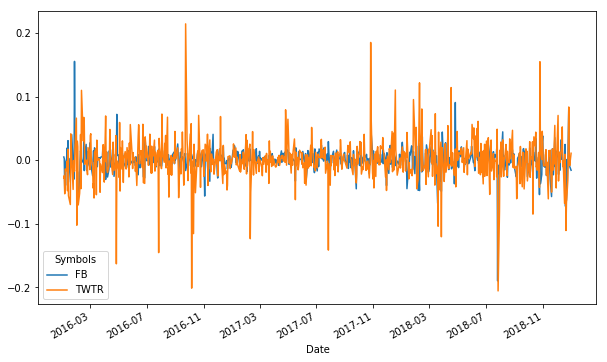

In [20]:
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

mu_FB, mu_MCD = ret.mean().FB, ret.mean().TWTR
std_FB, std_MCD= ret.std().FB, ret.std().TWTR
mu_FB, mu_MCD, std_FB, std_MCD

**Punto 3 (10 puntos)** Simular 1000 escenarios de rendimientos diarios para el año 2018 (para cada una de las empresas). Con estos rendimientos simulados, encontrar los respectivos precios al cierre simulados usando la fórmula repectiva. Graficar dichos precios simulados **en una gráfica diferente para cada empresa**.

**Solución**

In [21]:
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)
simret_FB = ret_sim(mu_FB, std_FB, 252, 1000, '2019-01-01')
simret_MCD = ret_sim(mu_MCD ,std_MCD , 252, 1000, '2019-01-01')

In [22]:
simcloses_FB = closes.iloc[-1].FB*((1+simret_FB).cumprod())
simcloses_MCD= closes.iloc[-1].TWTR*((1+simret_MCD).cumprod())

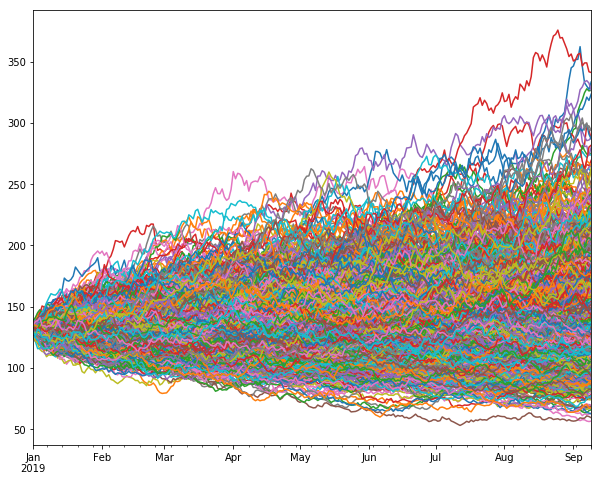

In [23]:
simcloses_FB.plot(figsize=(10,8),legend=False);

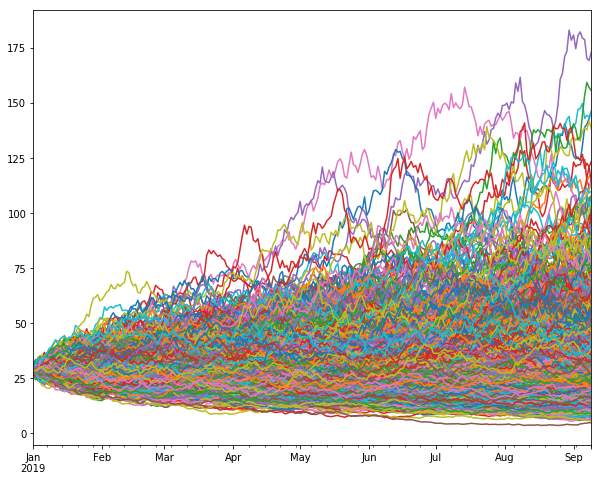

In [24]:
simcloses_MCD.plot(figsize=(10,8),legend=False);

**Punto 4 (10 puntos)** Calcular las probabilidades con base en una tasa de interés anual deseada del $10\%$.


**Solución**

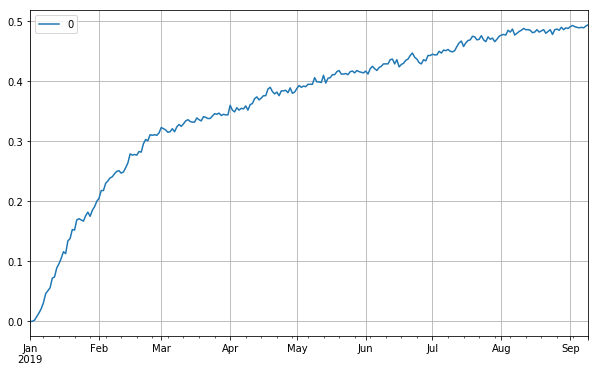

In [26]:
K_FB = (1+0.1)*closes.iloc[-1].FB
prob = pd.DataFrame((simcloses_FB>K_FB).sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

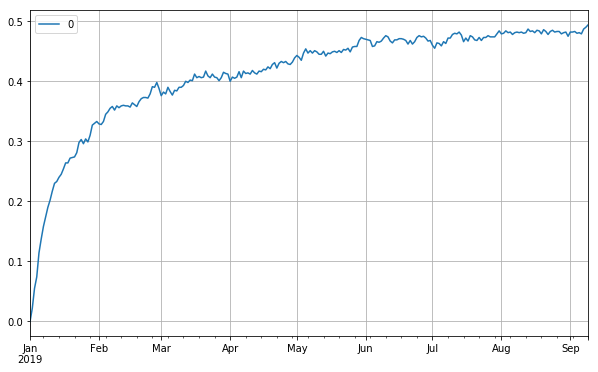

In [27]:
K_MCD= (1+0.1)*closes.iloc[-1].TWTR
prob = pd.DataFrame((simcloses_MCD>K_MCD).sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

**Punto extra (Bonus) (10 puntos)** Este punto no es obligatorio, es opcional y sirve como puntos extras para el que desee resolverlo correctamente (No se dará puntos parciales para este bonus, es decir o se obtiene 0 puntos o se obtienen 10 puntos, no hay puntos intermedios).

Descargue los datos de cada activo (empresa) del año 2018 y haga un análisis minucioso y detallado de éstos valores reales respecto a los simulados y a las probabilidades obtenidas en el punto anterior.

El análisis debe realizarse para cada empresa y se debe evaluar y concluir que tan acertados fueron los resultados anteriores.

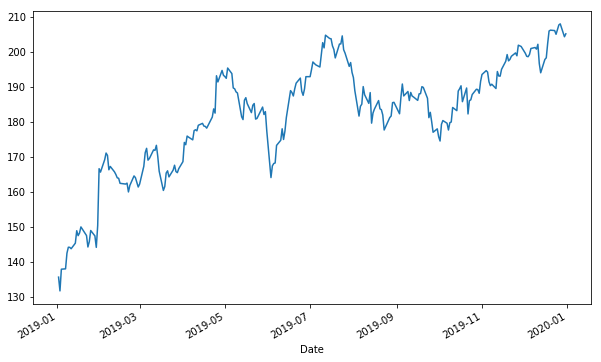

In [28]:
start, end = '2019-01-01', '2019-12-31'
name = ['FB','TWTR']
closes2018 = get_closes(names=name, start_date=start, end_date=end)
closes2018.FB.plot(figsize=(10,6));

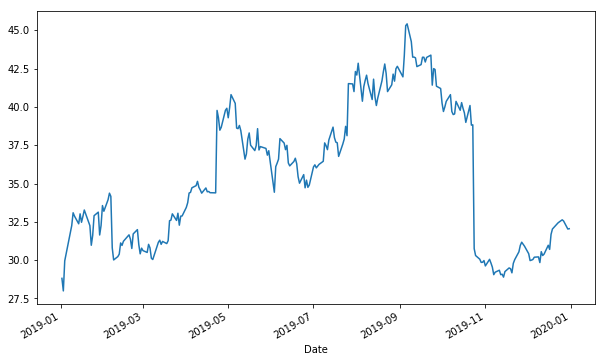

In [29]:
closes2018.TWTR.plot(figsize=(10,6));